# Proyecto 1 Regresion de Codigo
## Universidad Galileo
## Ciencia de Datos en Python
## Seccion V
## Pablo Daniel Passarelli López
## 17001393

### Imports de librerias

In [929]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [930]:
data=np.load('/Users/ppassarelli/Desktop/Galileo/Maestria/Ciencia_de_Datos_en_Python/Proyecto/proyecto_data/proyecto_training_data.npy', encoding='ASCII')
data.dtype

dtype('float64')

## Limpieza de datos

### obtenemos informacion de las columnas que tienen datos que no se pueden procesar como NaN o undefined

In [931]:
columnas_con_nan = np.isnan(data).any(axis=0)
porcentaje_nan_por_columna = (np.sum(np.isnan(data[:, columnas_con_nan]), axis=0) / len(data)) * 100
columnas_con_nan

array([False, False, False, False, False,  True])

### Como el porcentaje de NaNs es menor al 20% procedemos a imputar los valores con la media

In [932]:
media_nan = np.nanmean(data[:,-1])
data=np.nan_to_num(data, nan=media_nan)


## Separacion de la data en train, validate y test

In [933]:
train, validate, test = np.split(data, [int(len(data)*0.8), int(len(data)*0.9)])
train

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

In [934]:
train

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

## Analisis exploratorio:

1. Media
2. Valor Maximo
3. Valor Minimo
4. Rango
5. Desviacion Estandar

In [935]:
media=np.mean(train, axis=0)
maximo=np.amax(train, axis=0)
minimo=np.amin(train, axis=0)
rango=np.ptp(train, axis=0)
print('Media: ', media)
print('Maximo: ', maximo)
print('Minimo: ', minimo)
print('Rango: ',rango)

Media:  [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99651468e+01]
Maximo:  [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
Minimo:  [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
Rango:  [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]


In [936]:
df1=pd.DataFrame(train, columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

def min_max_normalize(column):
	return (column - column.min()) / (column.max() - column.min())

# Normalizar usando min-max
df1 = df1.apply(min_max_normalize)

## Graficas:

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_73318/4179949257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['SalePrice'], kde=False)


<Axes: xlabel='SalePrice'>

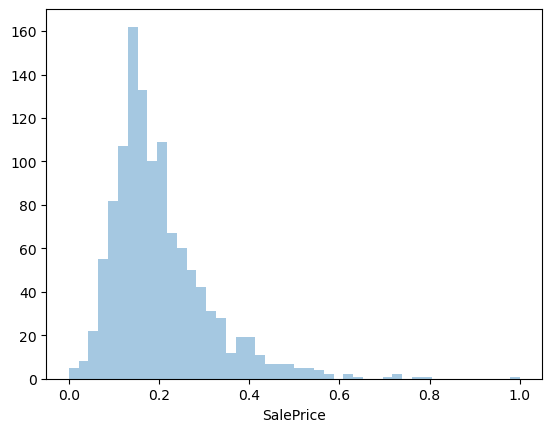

In [937]:
sns.distplot(df1['SalePrice'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_73318/2446878215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['OverallQual'], kde=False)


<Axes: xlabel='OverallQual'>

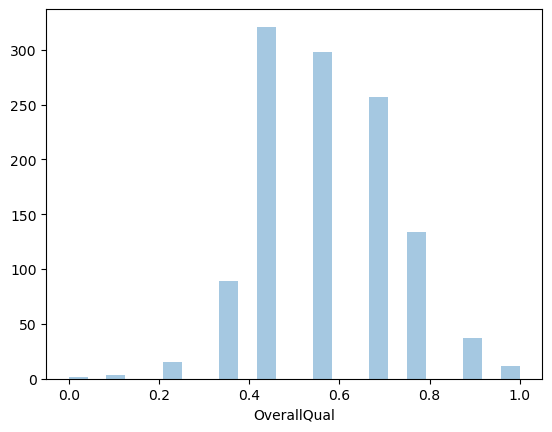

In [938]:
sns.distplot(df1['OverallQual'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_73318/480497543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['1stFlrSF'], kde=False)


<Axes: xlabel='1stFlrSF'>

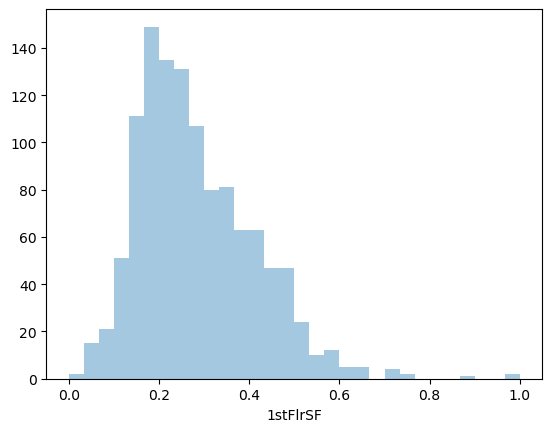

In [939]:
sns.distplot(df1['1stFlrSF'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_73318/1050585327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['TotRmsAbvGrd'], kde=False)


<Axes: xlabel='TotRmsAbvGrd'>

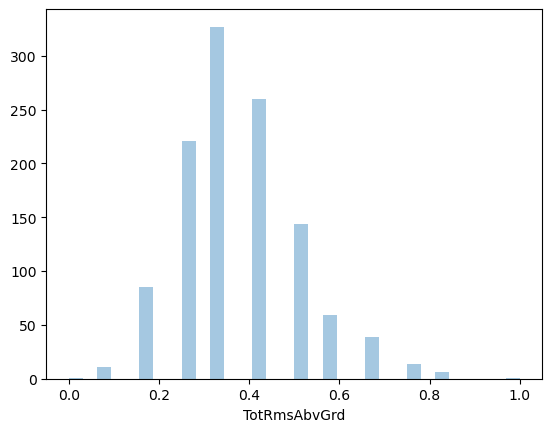

In [940]:
sns.distplot(df1['TotRmsAbvGrd'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_73318/3476031787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['YearBuilt'], kde=False)


<Axes: xlabel='YearBuilt'>

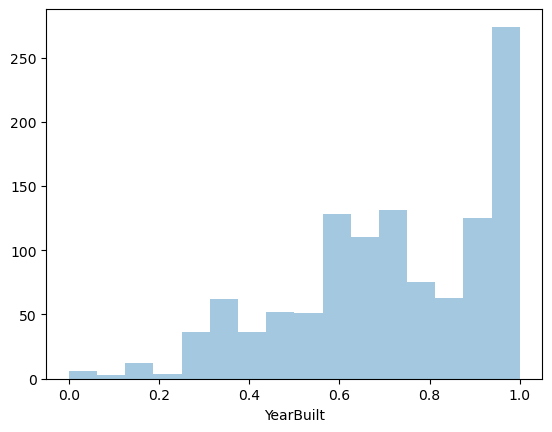

In [941]:
sns.distplot(df1['YearBuilt'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_73318/2031914862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['LotFrontage'], kde=False)


<Axes: xlabel='LotFrontage'>

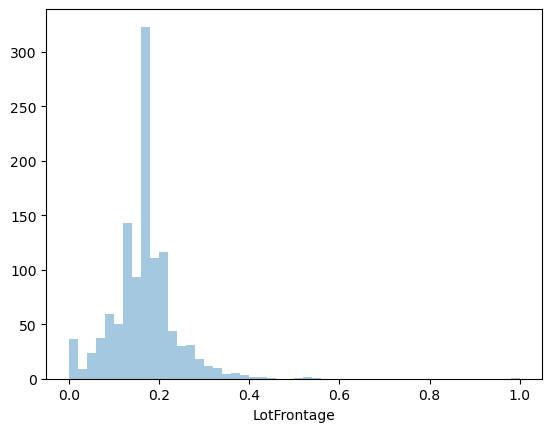

In [942]:
sns.distplot(df1['LotFrontage'], kde=False)

## Analisis de Correlacion

### Calidad general VS Precio de Venta

In [943]:
correlacion=np.corrcoef(df1['OverallQual'],df1['SalePrice'])
correlacion

array([[1.        , 0.79399005],
       [0.79399005, 1.        ]])

Text(0.5, 1.0, '0.793990050462641')

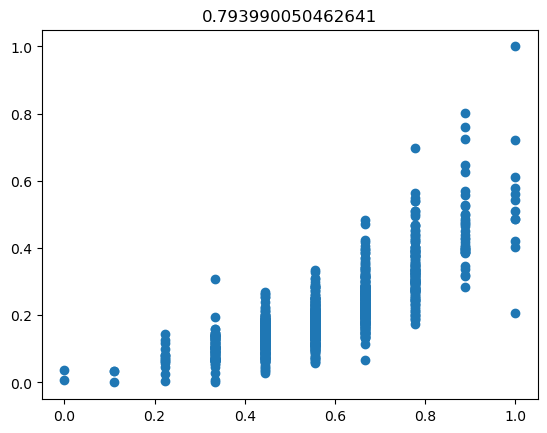

In [944]:
plt.scatter(df1['OverallQual'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Pies cuadrados del primer piso vs Precio de Venta

In [945]:
correlacion=np.corrcoef(df1['1stFlrSF'],df1['SalePrice'])
correlacion

array([[1.       , 0.6162887],
       [0.6162887, 1.       ]])

Text(0.5, 1.0, '0.6162887000998716')

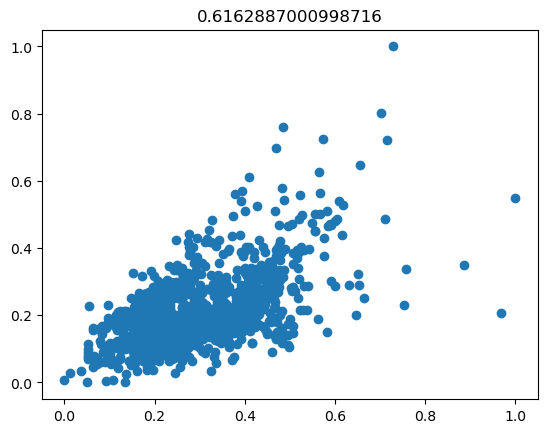

In [946]:
plt.scatter(df1['1stFlrSF'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Total de habitaciones vs Precio de Venta

In [947]:
correlacion=np.corrcoef(df1['TotRmsAbvGrd'],df1['SalePrice'])
correlacion

array([[1.        , 0.56470694],
       [0.56470694, 1.        ]])

Text(0.5, 1.0, '0.5647069399593061')

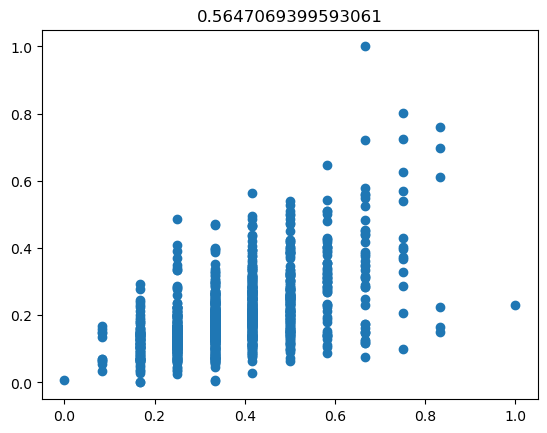

In [948]:
plt.scatter(df1['TotRmsAbvGrd'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Fecha de Construccion vs Precio de Venta

In [949]:
correlacion=np.corrcoef(df1['YearBuilt'],df1['SalePrice'])
correlacion

array([[1.        , 0.53417069],
       [0.53417069, 1.        ]])

Text(0.5, 1.0, '0.5341706927117513')

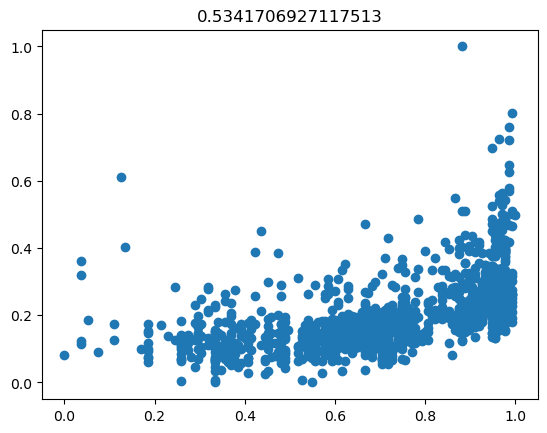

In [950]:
plt.scatter(df1['YearBuilt'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Pies lineales de calle vs Precio de Venta

In [951]:
correlacion=np.corrcoef(df1['LotFrontage'],df1['SalePrice'])
correlacion

array([[1.        , 0.34853847],
       [0.34853847, 1.        ]])

Text(0.5, 1.0, '0.3485384688906941')

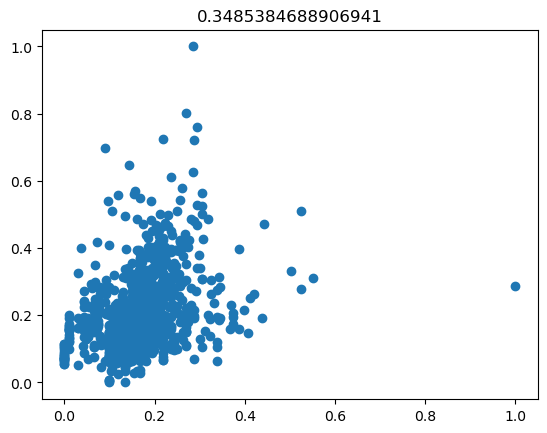

In [952]:
plt.scatter(df1['LotFrontage'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Analisis:

Basado en las graficas y coeficientes de correlacion seleccionamos las variables OverallQual y 1stFlrSF porque son las que tienen mayor potencial predictivo

## Modelo

In [953]:
def calcular_error(y, prediccion):
		vectores = (y - prediccion) ** 2
		error = (1/(2*len(y))) * np.sum(vectores)

		return error

def calcular_gradiente(x, y, prediccion):
		gradiente = np.array([])
		gradiente=np.append(gradiente, ((1/len(y)) * np.sum((prediccion - y) * x)))
		gradiente=np.append(gradiente, (1/ len(y)) * np.sum((prediccion - y)))

		return gradiente


def entrenar(x, y, epochs, imprimir_error_cada, escalar):
	x= np.array(x)
	y=np.array(y)
	errores=np.array([])
	gradiente=np.array([0,0])
	vector_unos = np.ones_like(x)
	matriz = np.column_stack((x, vector_unos))
	entrenamiento = {}

	betas = np.array([0.4, 0.4])

	for i in range(epochs):
		prediccion = np.dot(matriz, betas)
		error= calcular_error(y, prediccion)
		errores=np.append(errores, error)

		gradiente = calcular_gradiente(x, y, prediccion)

		betas = betas - (escalar*gradiente)

		if (i%imprimir_error_cada==0):
			print('Error: ', error)

		entrenamiento[i] = {
			'x': x,
			'prediccion': prediccion,
			'betas': betas,
			'error': error,
			'errores': errores,
			'gradientes': gradiente,
		}

	return entrenamiento, errores

entrenamiento, errores=entrenar(df1['OverallQual'], df1['SalePrice'], 39, 2, 0.01)

Error:  0.09259530567470016
Error:  0.08796655189647773
Error:  0.08357859484707399
Error:  0.07941890512718783
Error:  0.07547560528285192
Error:  0.07173743588259857
Error:  0.06819372335974071
Error:  0.06483434952792376
Error:  0.061649722682882144
Error:  0.05863075020786541
Error:  0.05576881260449311
Error:  0.053055738874868606
Error:  0.05048378318464143
Error:  0.04804560274036665
Error:  0.0457342368179766
Error:  0.04354308688246989
Error:  0.04146589774203731
Error:  0.039496739682799806
Error:  0.03762999153313424
Error:  0.035860324609217176


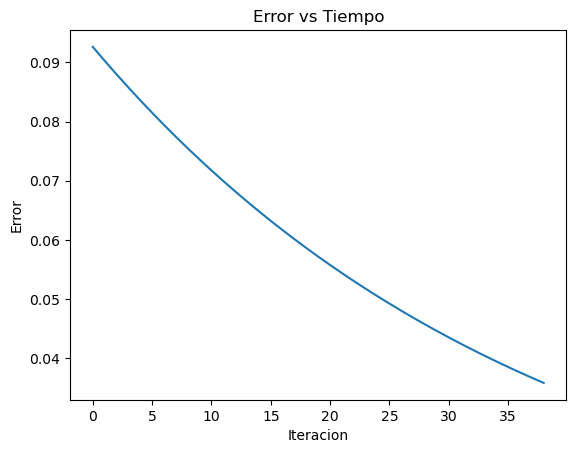

In [954]:
def graf_error(errores):
	plt.plot(errores)
	plt.xlabel('Iteracion')
	plt.ylabel('Error')
	plt.title('Error vs Tiempo')

graf_error(errores)

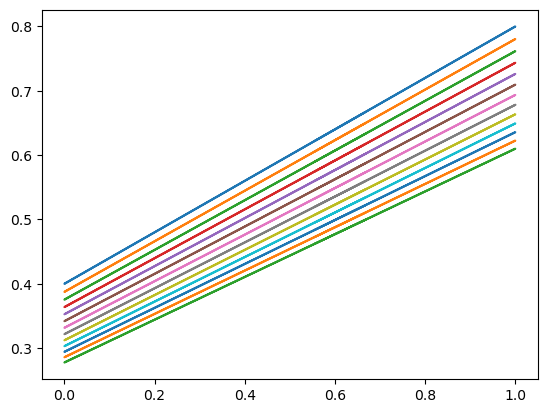

In [955]:
def graf_entrenamiento(entrenamiento, n):
  epocas=len(entrenamiento)
  for i in range(0, epocas, n):
    plt.plot(entrenamiento[i]['x'], entrenamiento[i]['prediccion'], label=f'Iteración {i}')
  

graf_entrenamiento(entrenamiento, 3)

In [957]:
entrenamiento_Overall, errores_Overall=entrenar(df1['OverallQual'], df1['SalePrice'], 39, 2, 0.04)

Error:  0.09259530567470016
Error:  0.07515874810215205
Error:  0.06113909155966514
Error:  0.049866601450894214
Error:  0.040802815900821465
Error:  0.03351481537200443
Error:  0.02765453561840217
Error:  0.022942135446870012
Error:  0.01915262451528153
Error:  0.016105112176993463
Error:  0.013654163627993777
Error:  0.01168285031047166
Error:  0.01009716248654261
Error:  0.008821516987124058
Error:  0.007795145473869957
Error:  0.006969190627364137
Error:  0.006304371503008394
Error:  0.0057691064937031205
Error:  0.005338004205145911
Error:  0.004990650130267481


In [958]:
entrenamiento_1stFlrSF,errores_1stFlrSF=entrenar(df1['1stFlrSF'], df1['SalePrice'], 39, 2, 0.04)

Error:  0.052302339884963134
Error:  0.04447685398697308
Error:  0.0379205416006345
Error:  0.03242754025236094
Error:  0.027825378826431227
Error:  0.023969561411242762
Error:  0.020739029657949423
Error:  0.018032361154788637
Error:  0.015764584433688635
Error:  0.013864510590005793
Error:  0.012272497719574133
Error:  0.010938577969120383
Error:  0.009820888383336704
Error:  0.008884356272106318
Error:  0.008099597814137717
Error:  0.007441995309579826
Error:  0.006890924104349435
Error:  0.006429104909080787
Error:  0.006042061173406012
Error:  0.0057176644753542515


In [960]:
from sklearn.linear_model import LinearRegression

In [968]:
vector_unos = np.ones_like(df1['OverallQual'])
matriz = np.column_stack((df1['OverallQual'], vector_unos))

reg = LinearRegression().fit(matriz, df1['SalePrice'])
reg.score(matriz, df1['SalePrice'])
reg.predict(np.array([[3, 5]]))


array([1.58334453])

In [969]:
vector_unos = np.ones_like(df1['OverallQual'])
matriz = np.column_stack((df1['1stFlrSF'], vector_unos))

reg = LinearRegression().fit(matriz, df1['SalePrice'])
reg.score(matriz, df1['SalePrice'])
reg.predict(np.array([[3, 5]]))

array([1.62069849])

In [ ]:
def comparar_modelos(x, y, vector):
    modelo_manual=entrenar(x, y, 34, 10, 0.01)
    modelo_scikit=LinearRegression().fit(matriz, df1['SalePrice'])
    #promedio = promedio(predicc)